In [ ]:
!pip3 install --upgrade tensorflow

In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
x = tf.Variable(None, name = "x")
y = tf.Variable(None, name = "y")

f = x*x*y + y + 2
a = x*x*y + y + 2
g = 2*(x*x*y + y + 2)
b = 2*(x*x*y + y + 2)

ValueError: initial_value must be specified.

In [5]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
f_val = f.eval(session=sess)
f1_val = sess.run(f)
print(f_val)

42


In [15]:
a_val,b_val = a.eval(session=sess),b.eval(session=sess)
print(a_val)
print(b_val)

42
84


In [16]:
A_val,B_val = sess.run([a,b])
print(A_val)
print(B_val)

42
84


In [ ]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close() #close the session

In [ ]:
with  tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
print(result)
#the session is automatically closed at the end of the block

#instead of manually running the initializer for every single variable, you can perform the global variables initializer function. This doesn't actually perform intialization immediately, but rather creates a node in the graph that will intialize all variables when it is run.

In [ ]:


X = tf.Variable(3, name = "X")
Y = tf.Variable(4, name = "Y")

g = X*X*Y+Y+2
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run() #actually intializes all the variables
    result = g.eval()
    print(result)

#you can create a regular session or an interactive session. The only difference from a regular session is that when an interactive session is created it automatically sets itself as a default session so you dont need the block/'

In [ ]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

tensor flow program is split into two parets
1. part1 builds the graph, the construction phase
2. part2 executes the graph, the computation phase

the computation phase generally runs a loop that evaluates a training step repeatedly (for example, one step per minibatch)

Any node you create is automatically added to the default graph

In [ ]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

Sometimes you may want to manage multiple independent graphs. You can do this by creating a new graph and temporarily making it the defailt graph inside a with a block

graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
x2.graph is graph

In [ ]:
x2.graph is tf.get_default_graph()

Lifecycle of a node value
 when you evaluate a node, Tensor flow automatically determines the set of nodes that it depends on and it evaluates these nodes first. For example, consider the following code

In [1]:
import tensorflow as tf
w = tf.constant(3)
x = w + 2
y = x + 5
z = x*3

with tf.Session() as sess:
    print(y.eval()) #10
    print(z.eval()) #15

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


10
15


ALL NODE VALUES ARE DROPPED BETWEEN GRAPH RUNS, EXCEPT VARIABLE VALUES, WHICH ARE MAINTAINED BY THE SESESSION ACROSS GRAPH RUNS.

A VARIABLE STATS ITS LIFE WHEN ITS INITIALIZER IS RUN AND IT ENDS WHEN THE SESSION IS CLOSED.

IF YOU WANT TO EVALUATE Y AND Z EFFICIENTLY, WITHOUT EVALUATING W AND X TWICE AS IN THE PREVIOUS CODE, YOU MUST ASK TENSOR FLOW EVALUATING BOYH Y AND Z IN JUST ONE GRAPH RUN, AS SHOWN IN THE FOLLOWING CODE.


In [2]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val)
    print(z_val)

10
15


The statement a.eval(session=sess) is equivalent to sess.run(a)

the statement a_val, b_val = a.eval(session=sess), b.eval(session=sess)

is equivalent to a_val,b_val = sess.run([a,b])

Linear regression with TensorFlow

In [20]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()
print(theta_value)

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


When using gradient descent, you should ensure that that all features being measured are on similar scale. hence normalize the input feature vecotrs or else training will take a long time.
Manually computing the gradients

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()
print(theta_value)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [3]:
n_epochs = 1000
learning_rate = 0.01

ss = StandardScaler()
scaled_housing_data_plus_bias = ss.fit_transform(housing_data_plus_bias)

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name ="y")
theta = tf.Variable(tf.random_uniform([n+1,1], -1,1), name="theta")
y_pred = tf.matmul(X,theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
gradients = 2/m*tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta, theta - learning_rate*gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch", epoch, "MSE = ",mse.eval())
        best_theta = theta.eval()

Epoch 0 MSE =  8.706797
Epoch 100 MSE =  8.706797
Epoch 200 MSE =  8.706797
Epoch 300 MSE =  8.706797
Epoch 400 MSE =  8.706797
Epoch 500 MSE =  8.706797
Epoch 600 MSE =  8.706797
Epoch 700 MSE =  8.706797
Epoch 800 MSE =  8.706797
Epoch 900 MSE =  8.706797


In [5]:
print(best_theta)

[[-0.686656  ]
 [ 0.4536736 ]
 [-0.44739008]
 [ 0.5772512 ]
 [-0.50801945]
 [-0.30591345]
 [ 0.00720382]
 [ 0.12195587]
 [-0.81578994]]


In [6]:
gradients = tf.gradients(mse,[theta])[0]
print(gradients)

Tensor("gradients/predictions_grad/MatMul_1:0", shape=(9, 1), dtype=float32)


In [ ]:
tensor flow computes the gradients for you, but it also provides a number of optimizers out of the box, including a gradient descent optimizer.

you can simply replace the preceding gradients = 

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

# you can change to a different type of opimtizer, you just need to change one line

place holder nodes

these nodes are special because they dont actually perform any computation, they just ouput the data you tell them to output at runtime.

they are typically used to pass the training data to a tensorflow during training. if you dont specify a value at runtime for a placeholder, you get an exception.

In [1]:
import tensorflow as tf

A = tf.placeholder(tf.float32, shape=(None,3))
B = A + 5

with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A:[[1,2,3]]})
    B_val_2 = B.eval(feed_dict={A:[[4,5,6],[7,8,9]]})
    
print('B_val_1')
print(B_val_1)
print('\n')
print('B_val_2')
print(B_val_2)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


B_val_1
[[6. 7. 8.]]


B_val_2
[[ 9. 10. 11.]
 [12. 13. 14.]]


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()
print(theta_value)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


In [2]:
X = tf.placeholder(tf.float32, shape=(None,n+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

batch_size = 100
n_batches = int(np.ceil(m/batch_size))

Finally, in the execution phase, fetch the minibatches one by one then provide the value of X and y via the feed_dict parameter when evaluating a node that depends on either of them.

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.placeholder(tf.float32, shape=(None,n+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

batch_size = 20640
n_batches = int(np.ceil(m/batch_size))

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_housing_data_plus_bias = ss.fit_transform(housing_data_plus_bias)


#X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")


def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index) 
    indices = np.random.randint(m, size=batch_size) 
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1, 1)[indices]
    return X_batch, y_batch

In [24]:
scaled_housing_data_plus_bias.shape

(20640, 9)

batch_size is the number of samples that will be pass through to the network at one time. 

batch is also referred to as mini-batch

An epoch is one single pass through all the nodes in the network.

batch size and epoch are not the same size.

Why not pass one piece of data one by one to the model rather than grouping the data in batches?

The larger the batch size, the faster the training in each epoch.

Depending uponcomputational resources of our machine it may be able to process more than one single sample at a time. The tradeoff is that even if our machine can handle very large batches, the quality of our model may degrade as we set our batches larger.

batch size is a hyperparameter we must test and tune during training

if we set our batch size is too big our machine may not have enough power to process them all in parallel.

https://www.youtube.com/watch?v=U4WB9p6ODjM

https://github.com/ageron/handson-ml/issues/242

In [3]:
n_epochs = 100
learning_rate = 0.01

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_housing_data_plus_bias = ss.fit_transform(housing_data_plus_bias)

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name ="y")
theta = tf.Variable(tf.random_uniform([n+1,1], -1,1), name="theta")
y_pred = tf.matmul(X,theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
gradients = 2/m*tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta, theta - learning_rate*gradients)

init = tf.global_variables_initializer()

mses = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            best_theta = theta.eval()
            #print('batch index: ',batch_index)
            #print("Epoch", epoch, "MSE = ",mse.eval())
            mses.append(mse.eval())
print(min(mses))

4.9958267


In [4]:
tf.random_uniform

<function tensorflow.python.ops.random_ops.random_uniform>

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%10==0:
            print("Epoch", epoch, "MSE = ",mse.eval())
        best_theta = theta.eval()

Epoch 0 MSE =  7.597785
Epoch 10 MSE =  7.597785
Epoch 20 MSE =  7.597785
Epoch 30 MSE =  7.597785
Epoch 40 MSE =  7.597785
Epoch 50 MSE =  7.597785
Epoch 60 MSE =  7.597785
Epoch 70 MSE =  7.597785
Epoch 80 MSE =  7.597785
Epoch 90 MSE =  7.597785
Epoch 100 MSE =  7.597785
Epoch 110 MSE =  7.597785
Epoch 120 MSE =  7.597785
Epoch 130 MSE =  7.597785
Epoch 140 MSE =  7.597785
Epoch 150 MSE =  7.597785
Epoch 160 MSE =  7.597785
Epoch 170 MSE =  7.597785
Epoch 180 MSE =  7.597785
Epoch 190 MSE =  7.597785
Epoch 200 MSE =  7.597785
Epoch 210 MSE =  7.597785
Epoch 220 MSE =  7.597785
Epoch 230 MSE =  7.597785
Epoch 240 MSE =  7.597785
Epoch 250 MSE =  7.597785
Epoch 260 MSE =  7.597785
Epoch 270 MSE =  7.597785
Epoch 280 MSE =  7.597785
Epoch 290 MSE =  7.597785
Epoch 300 MSE =  7.597785
Epoch 310 MSE =  7.597785
Epoch 320 MSE =  7.597785
Epoch 330 MSE =  7.597785
Epoch 340 MSE =  7.597785
Epoch 350 MSE =  7.597785
Epoch 360 MSE =  7.597785
Epoch 370 MSE =  7.597785
Epoch 380 MSE =  7.5977

#once you had trained your model, you should save its parameters to disk so you can come back tto it when you want, use it in another program or compare it to other models, etc.

You probably want to save checkpoints at regular intervals during training so that if your computer crashes during training you can continue from the last check point rather than start over from scratch.

tensor flow makes saving and restoring models very easy. Just create a saver node at the end of the construction phase (after all variable nodes are created). Then during the exercution phase, just call its save method whenever you want to save the model

In [ ]:
[....]
theta = tf.Variable(tf.random_uniform([n+1,1],-1,1),named='theta')
[....]
init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch%100==0:
            save_path = saver.save(sess,"/tmp/my_model.ckpt")
        
        sess.run(training_op)
    best_theta = theta.eval()
    save_path = saver.save(sess,"/tmp/my_model_final.ckpt")

Restoring a model is just as easy. You create a saver at the end of the construction phase just like before, but then at the beginning of the excution phase instead of initializing the variables using the init node, you call the restore() method of the saver object

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt,")

Visualizing the graph and training curves using tensorboard.

Tensor board. If you feed it some training stats, it will display nice interactive visualizations of these stats in your web browser. You can also provide it the graps definition and it will give you a great interface to browse through it. This is very useful to identifying errors in the graph and to finding bottle nects

steps

1. Tweak the program so it writes the graph definition and some training stats to a log directory that tensor board will read from. You need to use a different log directory everytime you run the program, or else tensorboard will merge stats from different runs which will mess up visualizations. The simplest solution for this is to include a time stamp in the log directory name.

2. Add some code the very end of the construction phase

In [ ]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

#next add the following code at the very end of the construction phase

mse_summary = tf.summary.scalar('MSE',mse)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

Manually computing the gradients

In [6]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")
y_pred = tf.matmul(X,theta,name="predictions")

error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")

gradients = (2/m)*tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta, theta - learning_rate*gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch: ",epoch," MSE = ",mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()

Epoch:  0  MSE =  5.678427
Epoch:  100  MSE =  4.887325
Epoch:  200  MSE =  4.8512945
Epoch:  300  MSE =  4.8374257
Epoch:  400  MSE =  4.8280025
Epoch:  500  MSE =  4.821218
Epoch:  600  MSE =  4.8163137
Epoch:  700  MSE =  4.812756
Epoch:  800  MSE =  4.810175
Epoch:  900  MSE =  4.8083014


In [10]:
best_theta

array([[ 9.0454292e-01],
       [ 7.7407807e-01],
       [ 1.3119236e-01],
       [-1.1784509e-01],
       [ 1.6477819e-01],
       [ 7.4407877e-04],
       [-3.9194502e-02],
       [-8.6135674e-01],
       [-8.2347989e-01]], dtype=float32)

Using autodiff



In [22]:
tf.reset_default_graph()

n_epochs=1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")
y_pred = tf.matmul(X,theta,name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
### the only different line from above
gradients = tf.gradients(mse,[theta])[0]
###
training_op = tf.assign(theta, theta - learning_rate*gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch%100 == 0:
            print("Epoch", epoch, "MSE = ",mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE =  5.678427
Epoch 100 MSE =  4.8873253
Epoch 200 MSE =  4.8512945
Epoch 300 MSE =  4.837425
Epoch 400 MSE =  4.8280025
Epoch 500 MSE =  4.821218
Epoch 600 MSE =  4.8163137
Epoch 700 MSE =  4.812756
Epoch 800 MSE =  4.810175
Epoch 900 MSE =  4.8083014


Mini batch gradient descent

In [5]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None,n+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")
y_pred = tf.matmul(X,theta,name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [6]:
n_epochs = 10

batch_size = 100

n_batches = int(np.ceil(m/batch_size))

In [9]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch*n_batches+batch_index)
    indices = np.random.randint(m,size=batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return X_batch, y_batch


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index,batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
    best_theta = theta.eval()

best_theta

array([[ 0.9045429 ],
       [ 0.82172453],
       [ 0.11330824],
       [-0.21355605],
       [ 0.32225588],
       [-0.00730818],
       [ 0.00515022],
       [-0.88384354],
       [-0.85685915]], dtype=float32)

Saving and restoring a model

In [10]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42), dtype=tf.float32, name="y")

y_pred = tf.matmul(X,theta, name="predictions")

error = y_pred - y

mse = tf.reduce_mean(tf.square(error),name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch%100==0:
            print("Epoch ",epoch, "MSE = ",mse.eval())
            save_patch = saver.save(sess,"/tmp/my_model.ckpt")
        sess.run(training_op)
    best_theta = theta.eval()
    save_patch = saver.save(sess, "/tmp/my_model_final.ckpt")

Epoch  0 MSE =  5.678427
Epoch  100 MSE =  4.8873253
Epoch  200 MSE =  4.8512945
Epoch  300 MSE =  4.837425
Epoch  400 MSE =  4.8280025
Epoch  500 MSE =  4.821218
Epoch  600 MSE =  4.8163137
Epoch  700 MSE =  4.812756
Epoch  800 MSE =  4.810175
Epoch  900 MSE =  4.8083014


In [52]:
best_theta

array([[ 9.0454292e-01],
       [ 7.7407807e-01],
       [ 1.3119239e-01],
       [-1.1784511e-01],
       [ 1.6477819e-01],
       [ 7.4408075e-04],
       [-3.9194513e-02],
       [-8.6135650e-01],
       [-8.2347965e-01]], dtype=float32)

In [49]:
tf.reset_default_graph()

In [53]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval()
    print(best_theta_restored)

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt
[[ 9.0454292e-01]
 [ 7.7407807e-01]
 [ 1.3119239e-01]
 [-1.1784511e-01]
 [ 1.6477819e-01]
 [ 7.4408075e-04]
 [-3.9194513e-02]
 [-8.6135650e-01]
 [-8.2347965e-01]]


In [54]:
np.allclose(best_theta,best_theta_restored)

True

IF you want a saver that loads and restores theta with a different name such as "weights"

In [55]:
saver = tf.train.Saver({"weights":theta})

To visualize the graph within jupyter we will use a tensor board server available online. So this will not work if you dont have internet access

In [57]:
!pip install tensorflow_graph_in_jupyter
from tensorflow_graph_in_jupyter import show_graph

show_graph(tf.get_default_graph)

  Could not find a version that satisfies the requirement tensorflow_graph_in_jupyter (from versions: )
No matching distribution found for tensorflow_graph_in_jupyter
You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'tensorflow_graph_in_jupyter'

In [58]:
!pip install tfgraphviz

  Stored in directory: /Users/main/Library/Caches/pip/wheels/09/32/14/5a088574d718bfeb86629b01549771914c53a06b4363576b67
Successfully built tfgraphviz
You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
tf.reset_default_graph()

from datetime import datetime

now ='' datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir,now)

In [14]:
n_epochs = 1000
learning_rate = 0.01

tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None,n+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")
y_pred = tf.matmul(X,theta,name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [15]:
mse_summary = tf.summary.scalar('MSE',mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

In [18]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
    ##### key part for making the graph
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index%10==0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch, y:y_batch})
                step = epoch*n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict = {X:X_batch,y:y_batch})
    ##### end key part
    best_theta = theta.eval()
    
file_writer.flush()
file_writer.close()
print("Best theta: ")
print(best_theta)

Best theta: 
[[ 0.9045429 ]
 [ 0.82172453]
 [ 0.11330824]
 [-0.21355605]
 [ 0.32225588]
 [-0.00730818]
 [ 0.00515022]
 [-0.88384354]
 [-0.85685915]]


In [91]:
print(error.op.name)

sub


In [92]:
print(mse.op.name)

mse


Problem 12: Ch9

In [ ]:
import tensorflow as tf

learning_rate = 0.01

tf.reset_default_graph()

#### math part
X = tf.placeholder(tf.float32, shape=(None,n+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")
y_lin = tf.matmul(X,theta,name="y_lin")

exp = tf.math.exp(y_lin,name='exp')
y_pred = tf.math.reciprocal(1+exp,name='predictions')

#### error part
error = tf.losses.log_loss(y,y_pred,weights=1.0,epsilon=1e-07,scope=None,loss_collection=tf.GraphKeys.LOSSES,reduction=Reduction.SUM_BY_NONZERO_WEIGHTS)
mse = tf.reduce_mean(tf.square(error),name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()


mse_summary = tf.summary.scalar('MSE',mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

#### batch gradient descent part
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
    ##### key part for making the graph
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index%10==0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch, y:y_batch})
                step = epoch*n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict = {X:X_batch,y:y_batch})
    ##### end key part
    best_theta = theta.eval()
    
file_writer.flush()
file_writer.close()
print("Best theta: ")
print(best_theta)

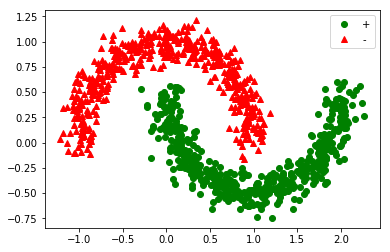

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
m = 1000
X_moons,y_moons = make_moons(m, noise=0.1, random_state=42)

plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1],'go',label="+")
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1],'r^',label="-")
plt.legend()
plt.show()

In [13]:
import numpy as np
X_moons_with_bias = np.c_[np.ones((m,1)),X_moons]
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [14]:
y_moons_column_vector = y_moons.reshape(-1,1)

Now split the data set into a training and test set.

In [15]:
test_ratio = 0.2
test_size = int(m*test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [77]:
def random_batch(X_train,y_train, batch_size):
    rnd_indices = np.random.randint(0,len(X_train),batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

X_batch, y_batch = random_batch(X_train_enhanced, y_train, 5)
X_batch

array([[ 1.00000000e+00,  1.18922384e+00,  2.90239421e-01,
         1.41425335e+00,  8.42389215e-02,  1.68186380e+00,
         2.44494558e-02],
       [ 1.00000000e+00,  1.10938723e+00,  1.18859347e-01,
         1.23074003e+00,  1.41275444e-02,  1.36536728e+00,
         1.67919071e-03],
       [ 1.00000000e+00,  7.32492937e-01, -4.07827755e-01,
         5.36545903e-01,  1.66323478e-01,  3.93016084e-01,
        -6.78313304e-02],
       [ 1.00000000e+00,  3.36634462e-01,  1.21225267e+00,
         1.13322761e-01,  1.46955654e+00,  3.81483467e-02,
         1.78147385e+00],
       [ 1.00000000e+00,  1.97396113e+00,  3.40788394e-01,
         3.89652255e+00,  1.16136729e-01,  7.69158406e+00,
         3.95780494e-02]])

In [7]:
y_batch

array([[0],
       [1],
       [0],
       [1],
       [1]])

In [20]:
import tensorflow as tf
tf.reset_default_graph()
n_inputs = 2
#DEFINE MATH
X = tf.placeholder(tf.float32, shape=(None,n_inputs+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")
theta = tf.Variable(tf.random_uniform([n_inputs+1,1],-1,1,seed=42),name="theta")
logits = tf.matmul(X,theta, name="logits")
#y_proba = 1/(1+tf.exp(-logits))
y_proba = tf.sigmoid(logits)

#DEFINE LOSS FUNCTION
#We could use a losss function defined the more complex way
#loss = -tf.reduce_mean(y*tf.log(y_proba+epsilon)+(1-y)*tf.log(1-y_proba+epsilon))
#or use a predefined function that does the same thing
loss = tf.losses.log_loss(y,y_proba)


#DEFINE GRADIENT DESCENT
#Now we do standard procedure, we want to minimize the loss function using a stochastic gradient descent process
# with a predefined learning rate
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

#now we initialize the global variables
init = tf.global_variables_initializer()

The moons data set has two input features, since each instance is a point on a plane, then there are two features for this training.

In [22]:
n_epochs = 10000
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train,y_train, batch_size)
            sess.run(training_op, feed_dict = {X:X_batch,y:y_batch})
        loss_val = loss.eval({X:X_test,y:y_test})
        if epoch%100 == 0:
            print("Epoch:",epoch, "\tLoss: ",loss_val)
    y_proba_val = y_proba.eval(feed_dict={X:X_test,y:y_test})

Epoch: 0 	Loss:  0.8766779
Epoch: 100 	Loss:  0.35170972
Epoch: 200 	Loss:  0.3111847
Epoch: 300 	Loss:  0.29458478
Epoch: 400 	Loss:  0.2858945
Epoch: 500 	Loss:  0.2815185
Epoch: 600 	Loss:  0.27875623
Epoch: 700 	Loss:  0.27693126
Epoch: 800 	Loss:  0.27552417
Epoch: 900 	Loss:  0.27477443
Epoch: 1000 	Loss:  0.27447549
Epoch: 1100 	Loss:  0.27394822
Epoch: 1200 	Loss:  0.27471218
Epoch: 1300 	Loss:  0.27355057
Epoch: 1400 	Loss:  0.27343094
Epoch: 1500 	Loss:  0.27344704
Epoch: 1600 	Loss:  0.27345246
Epoch: 1700 	Loss:  0.27272514
Epoch: 1800 	Loss:  0.27357823
Epoch: 1900 	Loss:  0.27331302
Epoch: 2000 	Loss:  0.27366465
Epoch: 2100 	Loss:  0.2735117
Epoch: 2200 	Loss:  0.2737029
Epoch: 2300 	Loss:  0.2742652
Epoch: 2400 	Loss:  0.27395967
Epoch: 2500 	Loss:  0.2737254
Epoch: 2600 	Loss:  0.27410138
Epoch: 2700 	Loss:  0.27376232
Epoch: 2800 	Loss:  0.2742486
Epoch: 2900 	Loss:  0.27471036
Epoch: 3000 	Loss:  0.27479243
Epoch: 3100 	Loss:  0.27417418
Epoch: 3200 	Loss:  0.2745962

KeyboardInterrupt: 

In [1]:
n_batches

NameError: name 'n_batches' is not defined

In [24]:
y_pred = (y_proba_val>=0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred)

0.8627450980392157

In [26]:
recall_score(y_test,y_pred)

0.8888888888888888

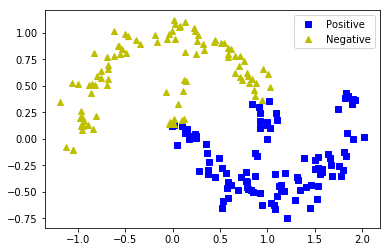

In [37]:
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx,1],X_test[y_pred_idx,2],'bs',label="Positive")
plt.plot(X_test[~y_pred_idx,1],X_test[~y_pred_idx,2], 'y^',label="Negative")
plt.legend()
plt.show()

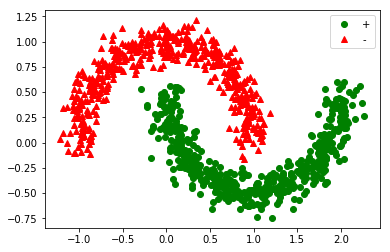

In [39]:
plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1],'go',label="+")
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1],'r^',label="-")
#plt.plot(X_test[y_pred_idx,1],X_test[y_pred_idx,2],'bs',label="Positive")
#plt.plot(X_test[~y_pred_idx,1],X_test[~y_pred_idx,2], 'y^',label="Negative")
plt.legend()
plt.show()

In [71]:
tf.reset_default_graph()

In [72]:
def logistic_regression(X,y,initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias,1],-1,1,seed=seed)
            
            theta = tf.Variable(initializer,name="theta")
            logits = tf.matmul(X,theta, name="logits")
            y_proba = tf.sigmoid(logits)
        
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y,y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            trainin_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss',loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [73]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [78]:
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:,1]),
                         np.square(X_train[:,2]),
                        X_train[:,1]**3,
                        X_train[:,2]**3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:,1]),
                       np.square(X_test[:,2]),
                       X_test[:,1]**3,
                       X_test[:,1]**3]

n_inputs = 2+4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32,shape=(None, n_inputs+1),name="X")
y = tf.placeholder(tf.float32, shape=(None,1),name="y")

y_proba,loss,training_op,loss_summary, init, saver = logistic_regression(X,y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [79]:
import os

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        #if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path,"rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess,checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch,n_epochs):
        for batch_index in range(n_batches):
            X_bath, y_batch = random_batch(X_train_enhanced,y_train, batch_size)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        loss_val, summary_str = sess.run([loss,loss_summary],feed_dict={X:X_test_enhanced,y:y_test})
        file_writer.add_summary(summary_str, epoch)
        
        if epoch%500==0:
            print("Epoch:",epoch, "\tLoss:",loss_val)
            saver.save(sess,checkpoint_path)
            with open(checkpoint_epoch_path,"wb") as f:
                f.write(b"%d"%(epoch+1))
        
    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X:X_test_enhanced,y:y_test})
    os.remove(checkpoint_epoch_path)

ValueError: Fetch argument <tf.Operation 'GradientDescent' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_theta/ApplyGradientDescent"
 is not an element of this graph.)

In [80]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

############
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]
############
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.8115457
Epoch: 500 	Loss: 0.17464584
Epoch: 1000 	Loss: 0.1261152
Epoch: 1500 	Loss: 0.101653725
Epoch: 2000 	Loss: 0.08674656
Epoch: 2500 	Loss: 0.076580994
Epoch: 3000 	Loss: 0.06915777
Epoch: 3500 	Loss: 0.06352329
Epoch: 4000 	Loss: 0.05907326
Epoch: 4500 	Loss: 0.055462204
Epoch: 5000 	Loss: 0.052427646
Epoch: 5500 	Loss: 0.049870644
Epoch: 6000 	Loss: 0.047660712
Epoch: 6500 	Loss: 0.04577277
Epoch: 7000 	Loss: 0.044102907
Epoch: 7500 	Loss: 0.04266536
Epoch: 8000 	Loss: 0.041323673
Epoch: 8500 	Loss: 0.040139202
Epoch: 9000 	Loss: 0.039099265
Epoch: 9500 	Loss: 0.038089704
Epoch: 10000 	Loss: 0.03719744


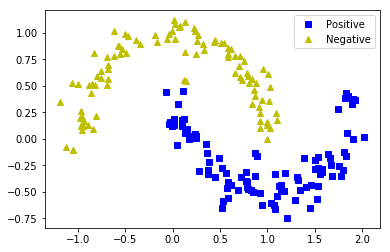

In [81]:
y_pred = (y_proba_val>=0.5)
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx,1],X_test[y_pred_idx,2],'bs',label="Positive")
plt.plot(X_test[~y_pred_idx,1],X_test[~y_pred_idx,2], 'y^',label="Negative")
plt.legend()
plt.show()